In [1]:
import pandas as pd
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset

In [2]:
conn = sqlite3.connect('inventory.db')
df = pd.read_sql_query('select * from vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies and ensure data quality before proceeding with further analysis.

In [3]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10648.0,1.064071e+04,18700.404409,2.00,3943.500000,7153.000000,9552.000000,1.733570e+05
Brand,10648.0,1.805450e+04,12643.196784,58.00,5816.500000,18776.500000,25521.250000,9.063100e+04
PurchasePrice,10648.0,2.440210e+01,109.483355,0.36,6.840000,10.450000,19.470000,5.681810e+03
ActualPrice,10648.0,3.567118e+01,148.534066,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10648.0,8.478839e+02,665.354152,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10648.0,3.145160e+03,11113.367455,1.00,36.000000,261.000000,1981.250000,3.376600e+05
TotalPurchaseDollars,10648.0,3.013816e+04,123277.154715,0.71,452.857500,3646.725000,20764.170000,3.811252e+06
TotalSalesQuantity,10648.0,3.081902e+03,10971.073340,0.00,33.000000,260.500000,1934.250000,3.349390e+05
TotalSalesDollars,10648.0,4.230292e+04,167947.264974,0.00,728.275000,5285.915000,28414.050000,5.101920e+06
TotalSalesPrice,10648.0,1.881365e+04,45018.406384,0.00,288.830000,2841.775000,16080.270000,6.728193e+05


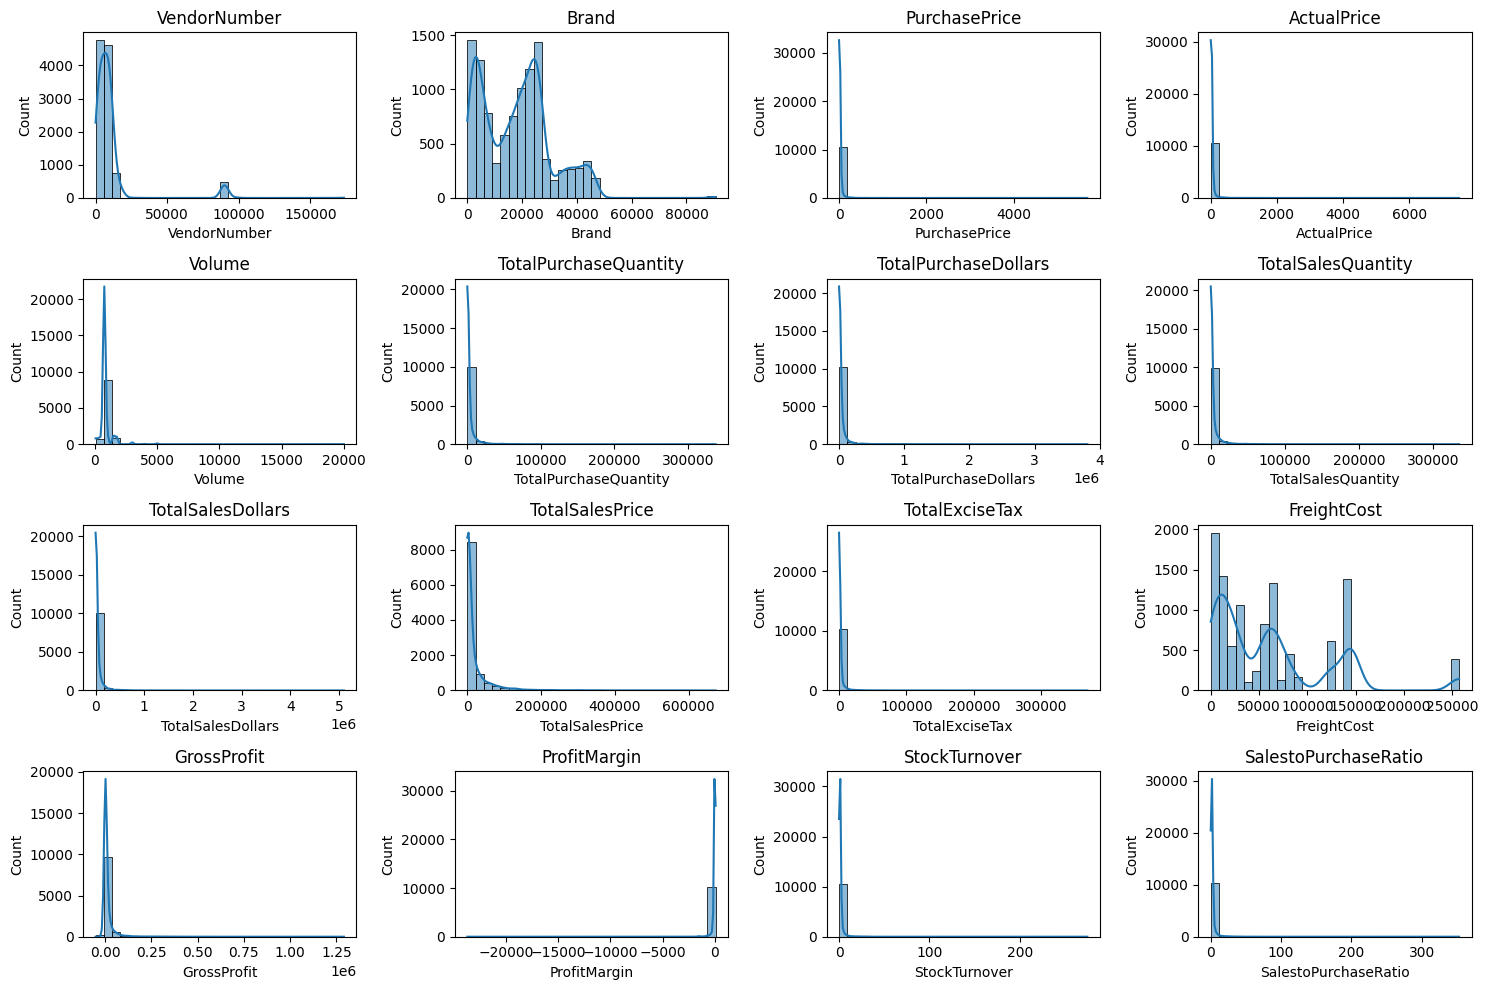

In [4]:
# Distribution plots for Numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

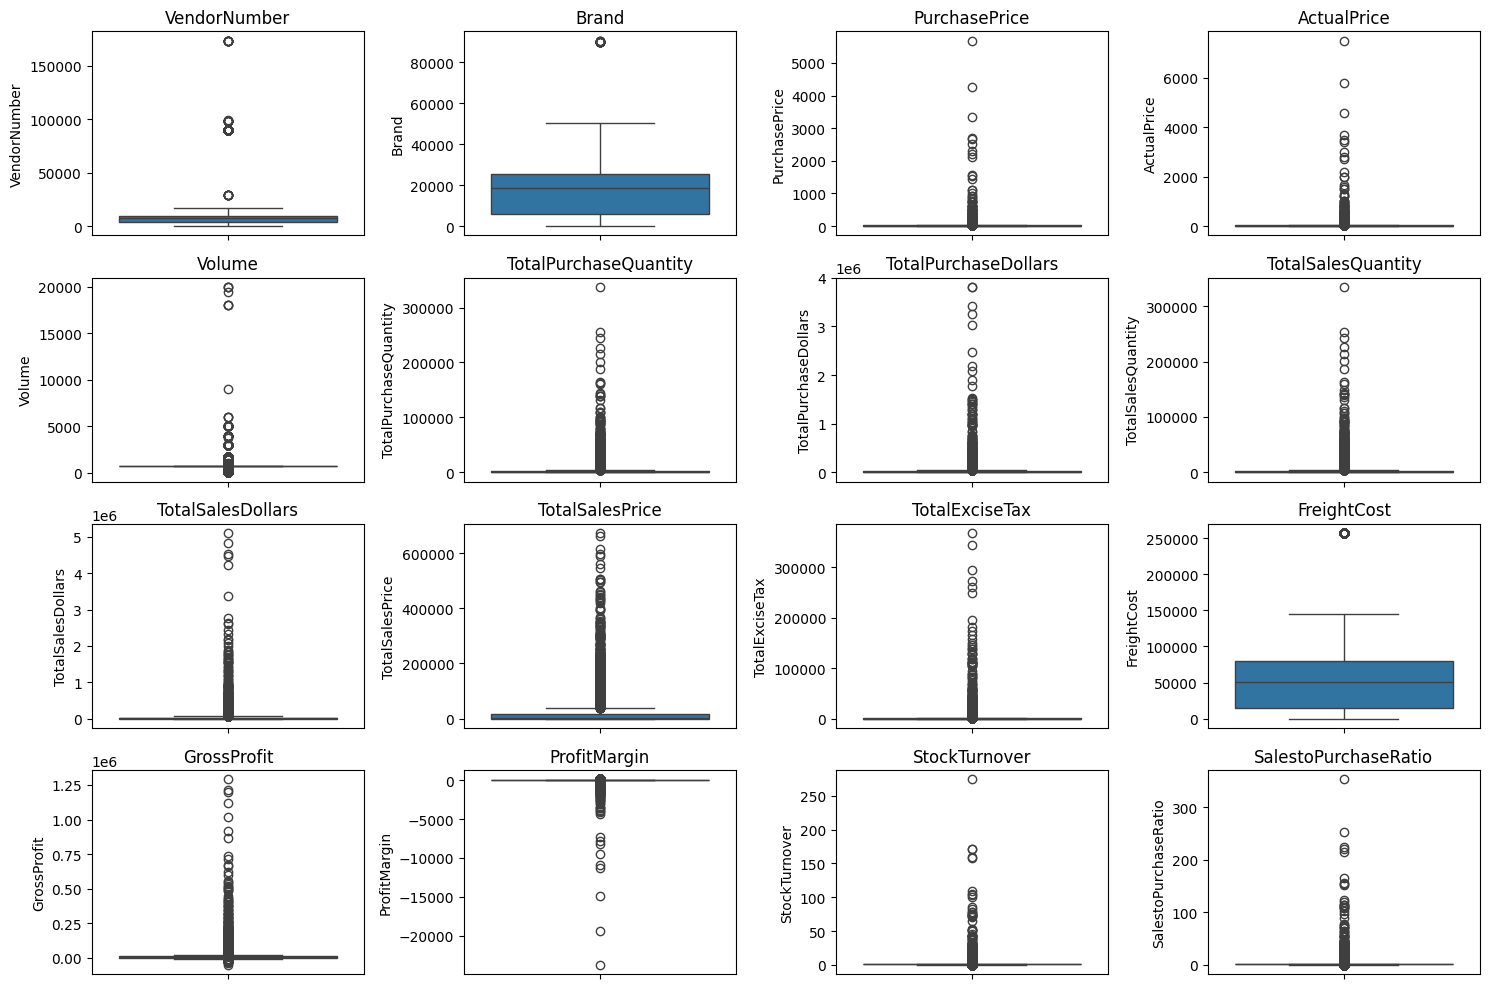

In [5]:
# Outlier detection with Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights:

### ❗ Negative & Zero Values:

- **Gross Profit**: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
- **Profit Margin**: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
- **Total Sales Quantity & Sales Dollars**: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

---

### 📈 Outliers Indicated by High Standard Deviations:

- **Purchase & Actual Prices**: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- **Freight Cost**: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- **Stock Turnover**: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely.  
  Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales being fulfilled from older stock.


In [6]:
# Let's filter the data by removing inconsistencies
df = pd.read_sql_query('''
    select * from vendor_sales_summary
    where GrossProfit>0
    and ProfitMargin >0
    and TotalSalesQuantity > 0                                      
''', conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8536,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8537,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8538,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8539,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


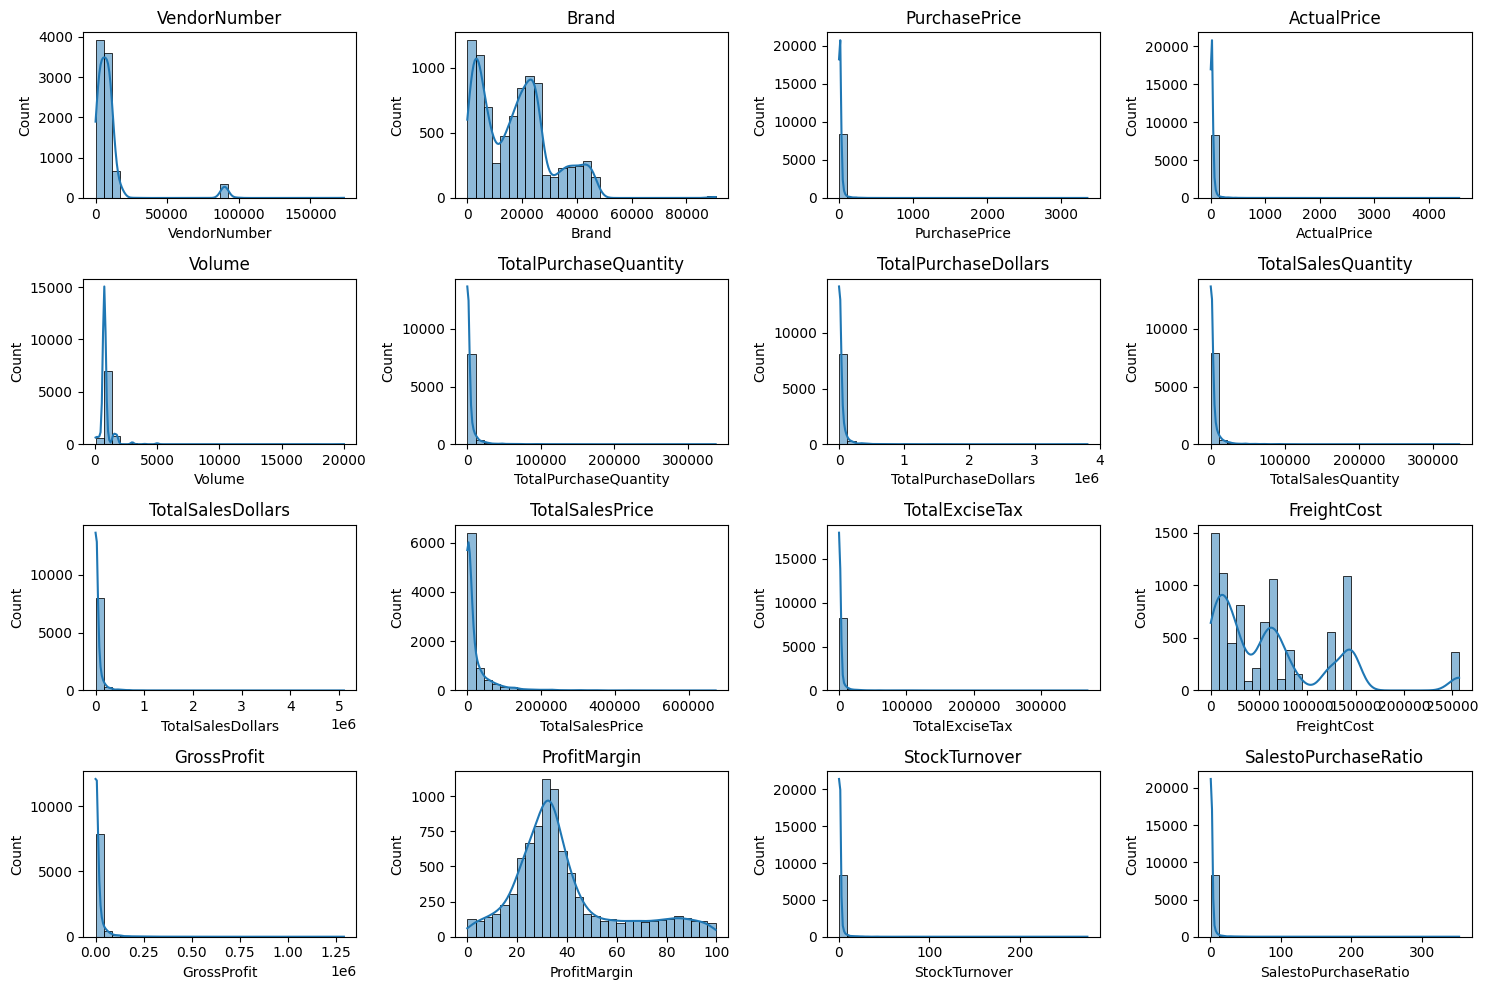

In [7]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

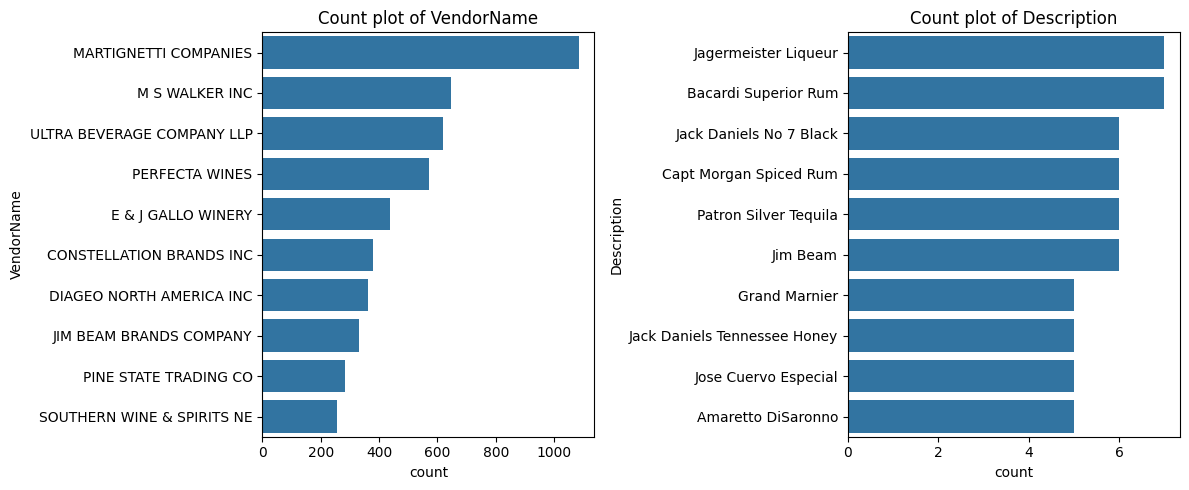

In [8]:
# Count plot for Categorical columns
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10])
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

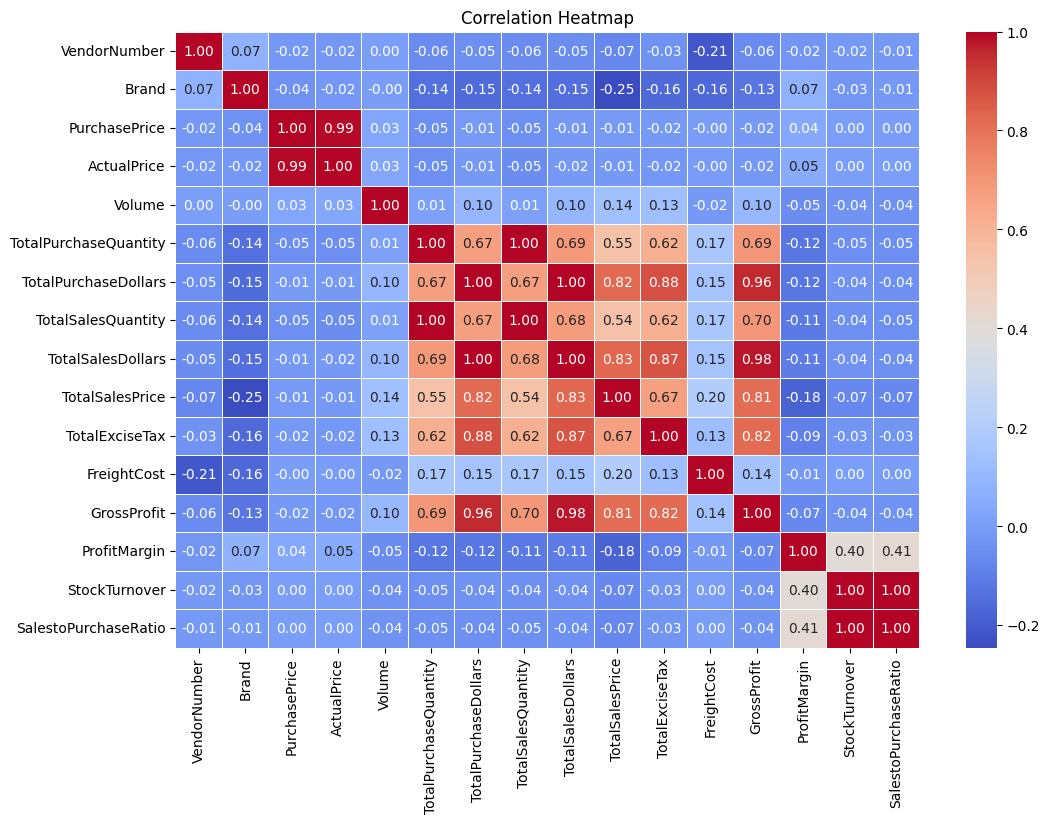

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 📊 Correlation Insights:

- **PurchasePrice** has weak correlations with **TotalSalesDollars** (-0.012) and **GrossProfit** (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

- **Strong correlation** between **Total Purchase Quantity** and **Total Sales Quantity** (0.999), confirming efficient inventory turnover.

- **Negative correlation** between **Profit Margin** & **Total Sales Price** (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

- **StockTurnover** has weak negative correlations with both **GrossProfit** (-0.038) and **ProfitMargin** (-0.055), indicating that faster turnover does not necessarily result in higher profitability.


## Data Analyis
Identify Brands that needs promotional or pricing adjustments which exhibits lower sales performance but higher profit margins

In [10]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [12]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [13]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold)&
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print('Brands with low sales but high profit margins:')
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
6197,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6235,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5072,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6243,Sbragia Home Ranch Merlot,549.75,66.444748


In [15]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

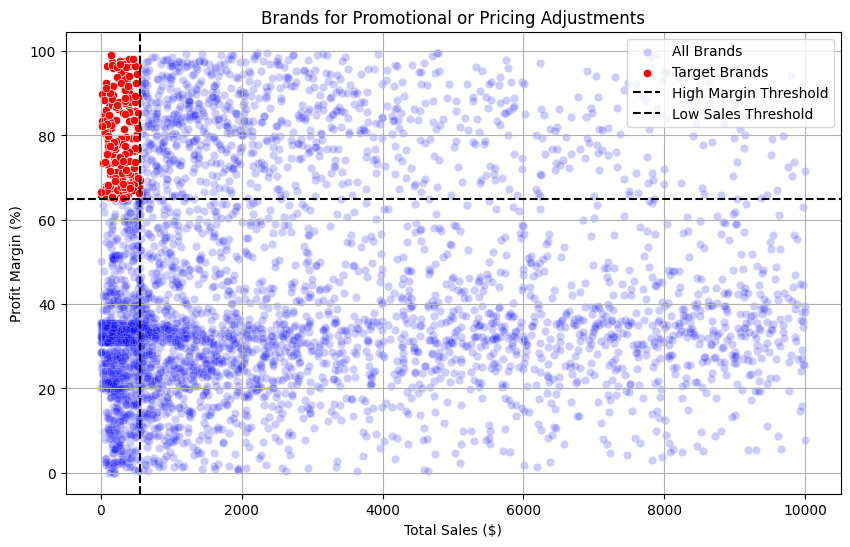

In [16]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance?

In [19]:
def format_dollars(value):
    if value >= 1_000_000:
        return f'{value/1_000_000: .2f}M'
    elif value >= 1_000:
        return f'{value/1_00:.2f}K'
    else:
        return str(value)

In [17]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16456111.43
M S WALKER INC                14679529.55
Name: TotalSalesDollars, dtype: float64

In [18]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [20]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black     7.96M
Tito's Handmade Vodka       7.40M
Grey Goose Vodka            7.21M
Capt Morgan Spiced Rum      6.36M
Absolut 80 Proof            6.24M
Jameson Irish Whiskey       5.72M
Ketel One Vodka             5.07M
Baileys Irish Cream         4.15M
Kahlua                      3.60M
Tanqueray                   3.46M
Name: TotalSalesDollars, dtype: object

In [21]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC       67.99M
MARTIGNETTI COMPANIES          39.33M
PERNOD RICARD USA              32.06M
JIM BEAM BRANDS COMPANY        31.42M
BACARDI USA INC                24.85M
CONSTELLATION BRANDS INC       24.22M
E & J GALLO WINERY             18.40M
BROWN-FORMAN CORP              18.25M
ULTRA BEVERAGE COMPANY LLP     16.46M
M S WALKER INC                 14.68M
Name: TotalSalesDollars, dtype: object

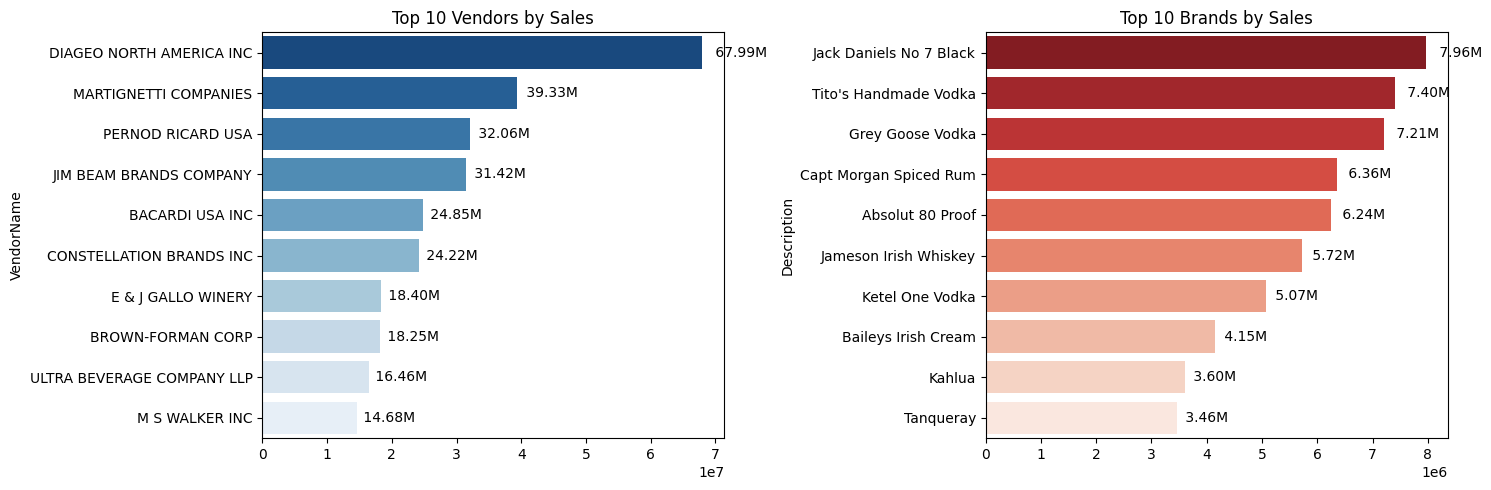

In [22]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Which vendors contribute the most to total purchase dollar?

In [23]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [25]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
113,WEIN BAUER INC,42694.64,13522.49,56217.13
114,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
115,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
116,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [26]:
#====== New Column -> Contribution of Vendors towards overall/total Purchase.
vendor_performance["PurchaseContribution%"] = ( vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum() ) * 100        # Purchase of vendor / Total Purchase) * 100  
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000146
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008382
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003818
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000305
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.034065
...,...,...,...,...,...
113,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013926
114,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097338
115,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.916818
116,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.697384


In [27]:
#=============== We need top 10 Vendors contributing the most to overall Purchase Dollars.
top_purchase_vendors = round(vendor_performance.sort_values("PurchaseContribution%", ascending = False), 2) # Decending order of PurcaseContribution    
top_purchase_vendors  = top_purchase_vendors.head(10)   # Top 10

#=============== Adjusting format like in Millions, Thousands etc by calling above created function "format_dollars()"
top_purchase_vendors["TotalPurchaseDollars"] = top_purchase_vendors["TotalPurchaseDollars"].apply(format_dollars)
top_purchase_vendors["GrossProfit"] = top_purchase_vendors["GrossProfit"].apply(format_dollars)
top_purchase_vendors["TotalSalesDollars"] = top_purchase_vendors["TotalSalesDollars"].apply(format_dollars)

#=== now see top 10 contributors of Purchasing.
top_purchase_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.34
56,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.32
67,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.78
45,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.66
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.69
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.98
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.32
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.94
105,ULTRA BEVERAGE COMPANY LLP,11.13M,5.33M,16.46M,3.63
52,M S WALKER INC,9.75M,4.93M,14.68M,3.18


====== Key Takes:
- Top 10 Vendors contribute 66% to overall PurchaseDollars.
- Remaining 106 (116-10) vendors contribute 36% only.

In [28]:
#=========== Adding commulative COntribution so that we can show them on graph
top_purchase_vendors["Cummulative_Contribution%"] = top_purchase_vendors["PurchaseContribution%"].cumsum()
top_purchase_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cummulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.34,16.34
56,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.32,24.66
67,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.78,32.44
45,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.66,40.10
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.69,45.79
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.98,50.77
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.32,55.09
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.94,59.03
105,ULTRA BEVERAGE COMPANY LLP,11.13M,5.33M,16.46M,3.63,62.66
52,M S WALKER INC,9.75M,4.93M,14.68M,3.18,65.84


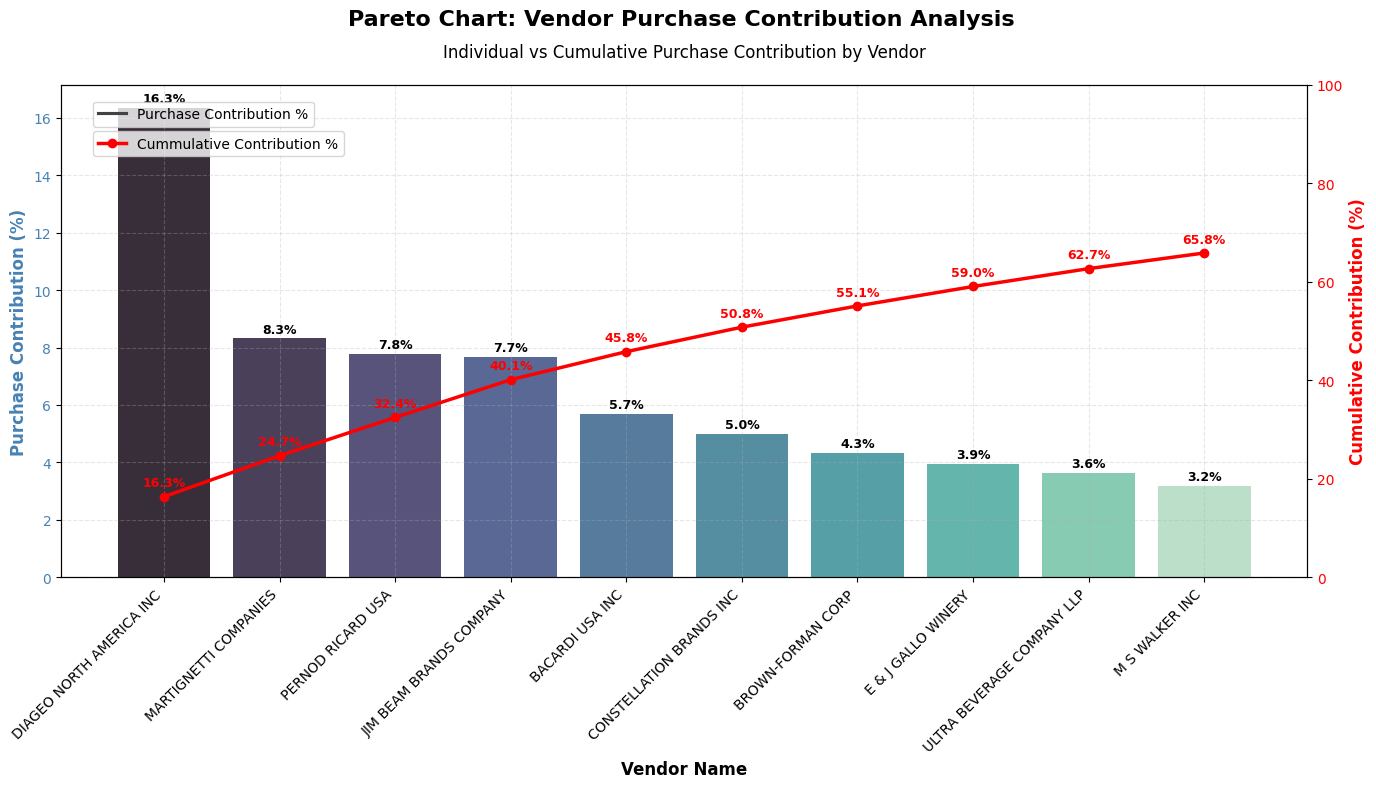

In [29]:
#=============== Let's visualize this  (I asked "Claude.ai" for this pereto chart(Bar + line plot) by providing above table and good promt, Here is what I got)
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 8))  # -> a Figure object (fig) → the overall canvas ,   an Axes object (ax1) → the actual area where the plot is drawn
                 #   figsize=(14, 8) sets the size of the canvas in inche
# Create the bar plot for Purchase Contribution%
bars = sns.barplot(data=top_purchase_vendors, x='VendorName', y='PurchaseContribution%', ax=ax1, 
                   palette='mako', alpha=0.9)

# Customize primary y-axis (bars)
ax1.set_xlabel('Vendor Name', fontsize=12, fontweight='bold')
ax1.set_ylabel('Purchase Contribution (%)', fontsize=12, fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Create secondary y-axis for cumulative line
ax2 = ax1.twinx()

# Create the line plot for Cumulative Contribution%
line = ax2.plot(range(len(top_purchase_vendors)), top_purchase_vendors['Cummulative_Contribution%'], 
                color='red', marker='o', linewidth=2.5, markersize=6, 
                label='Cumulative Contribution %')

# Customize secondary y-axis (line)
ax2.set_ylabel('Cumulative Contribution (%)', fontsize=12, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

# Add grid for better readability
ax1.grid(True, alpha=0.3, linestyle='--')

# Add value labels on bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add value labels on line points
for i, value in enumerate(top_purchase_vendors['Cummulative_Contribution%']):
    ax2.text(i, value + 1.5, f'{value:.1f}%', ha='center', va='bottom', 
             fontsize=9, fontweight='bold', color='red')

# Add title and subtitle
plt.suptitle('Pareto Chart: Vendor Purchase Contribution Analysis', 
             fontsize=16, fontweight='bold', y=0.98)
ax1.set_title('Individual vs Cumulative Purchase Contribution by Vendor', 
              fontsize=12, pad=20)

# Add legends
ax1.legend(['Purchase Contribution %'], loc='upper left', bbox_to_anchor=(0.02, 0.98))
ax2.legend(['Cummulative Contribution %'], loc='upper left', bbox_to_anchor=(0.02, 0.92))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add a subtle background color
fig.patch.set_facecolor('white')

# Show the plot
plt.show()

### 4. Total Procurement dependent on top vendors ( A company buys most of its goods or materials from a few top vendors. i.e., company is relying heavily on a few Vendors to provide what it needs to run the business).

In [30]:
#============ Top 10 vendors contributed most on purchase (calculated above)
print(f"Total purchase contribution of top 10 vendors: {round(top_purchase_vendors['PurchaseContribution%'].sum(),2)}%")
#======== Dependency on top 10 vendors (remaining 106 vendors contriobute collectively 36%)

Total purchase contribution of top 10 vendors: 65.84%


In [32]:
#========= Let's show it graphically using pie chart
vendors = list(top_purchase_vendors['VendorName'].values)
purchasecontribution = list(top_purchase_vendors['PurchaseContribution%'].values)

#==== finding contribution of rest (106) vendors
total_contribution = sum(purchasecontribution)
remaining_contribution = 100 - total_contribution
#=== adding it to above lists
vendors.append("Other Vendors")   # new element to list vendors
purchasecontribution.append(remaining_contribution)   # their corresponding contribution to purchase

In [33]:
purchasecontribution

[16.34, 8.32, 7.78, 7.66, 5.69, 4.98, 4.32, 3.94, 3.63, 3.18, 34.16]

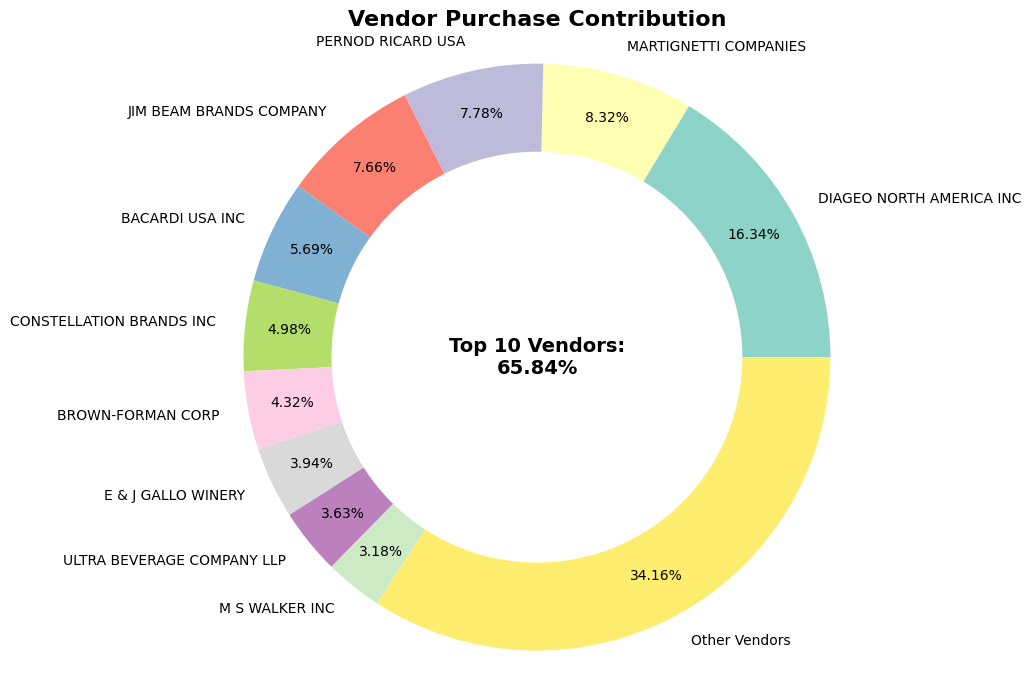

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))

# Builtin colosrs
clr = plt.cm.Set3(np.linspace(0, 1, len(purchasecontribution)))
# Create pie chart with hole in middle (donut)
wedges, texts, autotexts = ax.pie(purchasecontribution, 
                                  labels=vendors,
                                  autopct='%1.2f%%',
                                  pctdistance=0.85,
                                  colors = clr,
                                  wedgeprops=dict(width=0.5))

# Add center circle for donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

#========= Add top 10 vendors contribution at the center
plt.text(0,0, f"Top 10 Vendors:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha= 'center', va='center')


# Title
plt.title('Vendor Purchase Contribution', fontsize=16, fontweight='bold')

# Make it circular and show
ax.axis('equal')
plt.tight_layout()
plt.show()

### 5.Does purchasing in bulk reduce the unit price? If yes, what is the optimal purchase volume for cost savings?"

In [37]:
#========= price of single quantity (unit purchase price)  -> add as a new column in our dataset
df["UnitPurchasePrice"] = df["TotalPurchaseDollars"] / df["TotalPurchaseQuantity"]   # It is actually same as 'Purchase price, but still for understanding
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8536,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8537,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8538,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8539,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [38]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3,  labels=["Small", "Medium", "Large"] )
""" pd.qcut(data, No_of_bins, labels=None):
pd.qcut() is used to split a column into equal-sized quantile bins (like quartiles, percentiles, etc.). It's useful when you want to divide data into parts that each contain the same number of observations.
"""
display(df)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8536,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small
8537,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small
8538,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small
8539,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small


In [39]:
#======= Now we will analyse average unit purchase price varying based on small, medium, large purchase quantity
df.groupby("OrderSize")["UnitPurchasePrice"].mean().reset_index()

,OrderSize,UnitPurchasePrice
0,Small,39.128653
1,Medium,15.489374
2,Large,10.776200


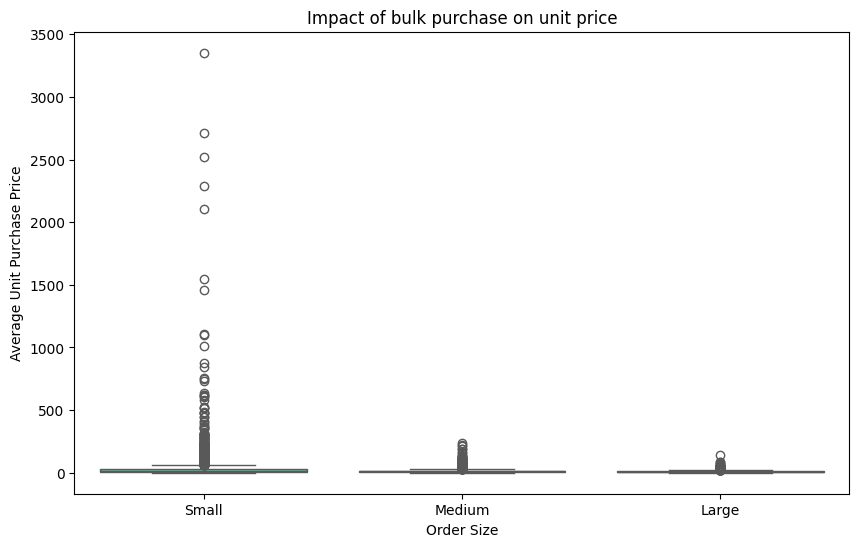

In [40]:
#====== Analyze using box plot to idea of variation
plt.figure(figsize= (10,6))
sns.boxplot(data = df, x = "OrderSize", y= "UnitPurchasePrice", palette="Set2")
plt.title("Impact of bulk purchase on unit price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

### Key Takes:
- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.52 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### 6.Vendors having low inventory turnover, indicating excess stock and slow-moving products.

In [41]:
#======== We don't need to work on all vendors but those with low inventory turnover indicating they have excess stock and not able to move that i.e., StockTurnover < 1 are meaningful for us
low_stockturnover_vendors =  df[df["StockTurnover"] < 1].groupby("VendorName")[["StockTurnover"]].mean()
low_stockturnover_vendors = low_stockturnover_vendors.sort_values("StockTurnover", ascending= True).reset_index()
low_stockturnover_vendors = low_stockturnover_vendors.head(10) # top 10 vendors with lowest stock turnover
low_stockturnover_vendors

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
1,HIGHLAND WINE MERCHANTS LLC,0.708333
2,PARK STREET IMPORTS LLC,0.751306
3,Circa Wines,0.755676
4,Dunn Wine Brokers,0.766022
5,CENTEUR IMPORTS LLC,0.773953
6,SMOKY QUARTZ DISTILLERY LLC,0.783835
7,TAMWORTH DISTILLING,0.797078
8,THE IMPORTED GRAPE LLC,0.807569
9,WALPOLE MTN VIEW WINERY,0.820548


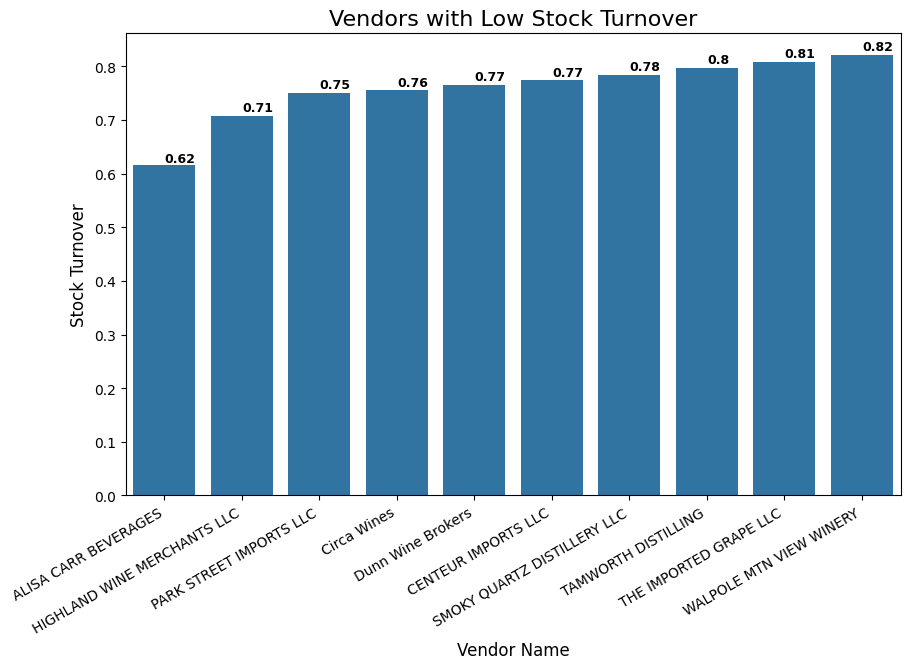

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(data = low_stockturnover_vendors, x = "VendorName", y= "StockTurnover")

# For data labels
for i, value in enumerate(low_stockturnover_vendors["StockTurnover"].values):  # i : index(position), value: actual sales 
    plt.text(i, value*1.02, round(value,2), va='center', ha='left', fontsize=9, fontweight= "bold")
#============= OR ======================
# ======= |> Add data labels on top of each bar
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2,
#             height + 0.05,                # Slightly above the bar
#             f'{height:.2f}',              # Format to 2 decimals
#             ha='center', va='bottom', fontsize=9)

# Add title and axis labels with font sizes
plt.title("Vendors with Low Stock Turnover", fontsize=16)
plt.xlabel("Vendor Name", fontsize=12)
plt.ylabel("Stock Turnover", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=10)

plt.show()

### 7. Capital that is locked in unsold inventory per vendor & Vendors contributing most to

In [43]:
#====== new column "UnsoldInventoryValue" : To get how much we have purchased and remained unsold.
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"] ) * df["PurchasePrice"]   # Amount we spent to purchase but not sold yet
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8536,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,...,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,Small,-3.96
8537,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,...,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,Small,-49.92
8538,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,...,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small,0.00
8539,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,...,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,Small,-104.37


In [44]:
#========= Overall unsold amount/capital
print("Total Unsold Capital: ", format_dollars(df["UnsoldInventoryValue"].sum()) )   # format_dollars(sales) function above to change format of amount like 10000002 = "1.2M"

Total Unsold Capital:   2.69M


In [45]:
#=========== Unsold capital locked Per Vendor
unsold_inv_per_vendor = df.groupby("VendorName")[["UnsoldInventoryValue"]].sum().reset_index()


#=============== Top 10 Vendors who have maximum capital locked in unsold inventory
unsold_inv_per_vendor = unsold_inv_per_vendor.sort_values(by = "UnsoldInventoryValue", ascending= False)
unsold_inv_per_vendor["UnsoldInventoryValue"] = unsold_inv_per_vendor["UnsoldInventoryValue"].apply(format_dollars)  # === applying above format_dollars() -> formating floating Amount into string Millions, Thousands etc .
unsold_inv_per_vendor = unsold_inv_per_vendor.head(10)  # Need top 10


unsold_inv_per_vendor

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,7222.09K
45,JIM BEAM BRANDS COMPANY,5546.66K
67,PERNOD RICARD USA,4706.26K
115,WILLIAM GRANT & SONS INC,4019.61K
30,E & J GALLO WINERY,2282.83K
11,BROWN-FORMAN CORP,1777.34K
78,SAZERAC CO INC,1730.26K
20,CONSTELLATION BRANDS INC,1336.18K
60,MOET HENNESSY USA INC,1264.78K
76,REMY COINTREAU USA INC,1185.98K


### ========== 8. HYPOTHESIS TESTING ===========
- Use T-tests { not Z(n> 30, pop var known) or Chi-square(for categorical data) } because:
    - we’re comparing means (average performance metrics like sales/ratings).
    - Sample sizes might be small (common for vendor data).
    - Population variance is unknown.

### Part 1 Confidence Interval:- Using Confidence Interval to Compare top performing and low performing vendors.
- Find 95% confidence intervals for both top-performing & low-performing vendors & compare performance.

In [46]:
#======= Setting threshold for top & low performing vendors
top_threshold = df["TotalSalesDollars"].quantile(0.75)  # gives 75th percentile value i.e., value below which 75 values lie
low_threshold = df["TotalSalesDollars"].quantile(0.25)   # Threshold -> low vendors those having value <= 25th smallest value

In [47]:
#======= Now top vendors based on above threshold -> We will check ProfitMargin of vendors wich high and low Sales
top_vendors =  df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()       # Considering Profit Margin of top and low performing vendors
low_vendors =  df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()   # dop if there is any empty entry

In [48]:
#=== just to check
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3509    79.684817
3667    85.782102
4736    93.085860
4905    95.012530
5035    94.271857
Name: ProfitMargin, Length: 2136, dtype: float64

In [49]:
low_vendors

5615     4.111764
5636     6.145626
5685    12.007271
5688     1.677308
5708     7.239599
          ...    
8536    83.448276
8537    96.436186
8538    25.252525
8539    98.974037
8540    99.166079
Name: ProfitMargin, Length: 2136, dtype: float64

In [50]:
#============ Function that computes confidence interval -> Called later on below
def confidence_interval(data, confidence= 0.95):   # t - test where pop variance is unkonwn and we use sample variance
    n = len(data)   # no of elements
    mean_value = np.mean(data) 
    std_err = np.std(data, ddof = 1) /  np.sqrt(n)   # (np.std(data, ddof = 1) -> compute std dev of sample)  -> By default, np.std() uses delta deg of freed - ddof=0, which calculates the population standard deviation.
    #=== computing critical value of t-distribution  -> a cutoff point on a distribution (like Z, T, or Chi-square) that helps decide whether to reject the null hypothesis. (reject Ho if value > critical value
    t_critical = stats.t.ppf((1+confidence)/2 , df = n -1)  # stats.t.ppf(x, df) -> Give me the t-value such that the area to the left of it is X. (Here we have 2 tail test so at 95%, X = .95 + (.05/2) = 0.975 (1+.95 / 2)  : 0.5/2 added to X becz we have take accound its half as its half is included on left tail area
    margin_of_err = t_critical * std_err  # as we studied Confidence interval = mean +_ t(α/2)*std_err = mean +_ MOF
    # === finally return mean(center of dist), lower-bound, upper-bound
    return mean_value, mean_value - margin_of_err, mean_value + margin_of_err  
#==== at 95% conidence, this interval mean we are 95% confident the value e in this interval only (5% chances to make error - type I - reject H0 when it is true)

In [51]:
#============== Check and get values
top_mean, top_lower_bound, top_upper_bound =  confidence_interval(top_vendors)  # Confidence int for top_vendors
print(f"Top Vendors 95% CI : ({top_lower_bound:.2f},{top_upper_bound:.2f}), Mean: {top_mean:.2f}")

Top Vendors 95% CI : (30.73,31.60), Mean: 31.17


In [52]:
low_mean, low_lower_bound, low_upper_bound =  confidence_interval(low_vendors)
print(f"Low Vendors 95% CI : ({low_lower_bound:.2f},{low_upper_bound:.2f}), Mean: {low_mean:.2f}")

Low Vendors 95% CI : (40.46,42.60), Mean: 41.53


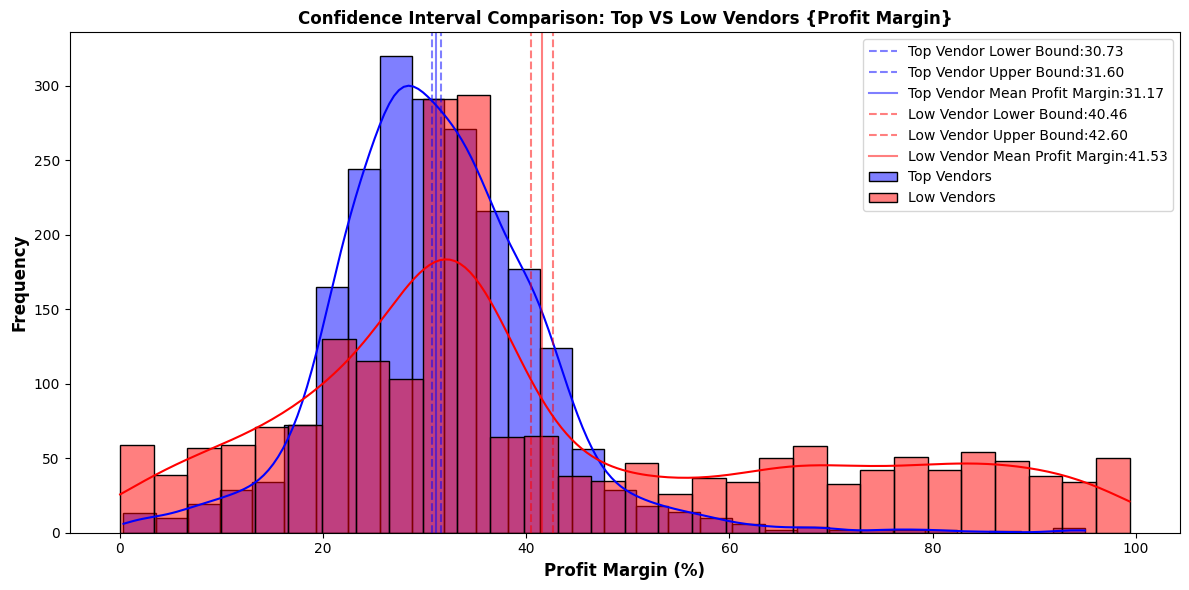

Top Vendors 95% CI : (30.73,31.60), Mean: 31.17
Low Vendors 95% CI : (40.46,42.60), Mean: 41.53


In [53]:
#============== Showing it graphically using histogram with kde=True (kernal density estimation: smoothing distri), vertical lines showing confidence interval
plt.figure(figsize=(12,6))

#================ For Top Vendors
sns.histplot(top_vendors, bins= 30, kde=True, color = "blue", alpha= 0.5, label = "Top Vendors")
# Confidence interval & mean with vertical lines
plt.axvline(top_lower_bound, color= "blue", alpha = 0.5, linestyle="--", label=f"Top Vendor Lower Bound:{top_lower_bound:.2f}")  # Lower bound
plt.axvline(top_upper_bound, color= "blue", alpha = 0.5, linestyle="--", label=f"Top Vendor Upper Bound:{top_upper_bound:.2f}")  # upper bound
plt.axvline(top_mean, color= "blue", alpha = 0.5, linestyle="-", label=f"Top Vendor Mean Profit Margin:{top_mean:.2f}")  #== Mean value - central value of distribution



#================ For Low performing Vendors
sns.histplot(low_vendors, bins= 30, kde=True, color = "red", alpha= 0.5, label = "Low Vendors")
# Confidence interval & mean with vertical lines
plt.axvline(low_lower_bound, color= "red", alpha = 0.5, linestyle="--", label=f"Low Vendor Lower Bound:{low_lower_bound:.2f}")  # Lower bound
plt.axvline(low_upper_bound, color= "red", alpha = 0.5, linestyle="--", label=f"Low Vendor Upper Bound:{low_upper_bound:.2f}")  # upper bound
plt.axvline(low_mean, color= "red", alpha = 0.5, linestyle="-", label=f"Low Vendor Mean Profit Margin:{low_mean:.2f}")  #== Mean value - central value of distribution







#======== Customize
plt.title("Confidence Interval Comparison: Top VS Low Vendors {Profit Margin}", fontsize= 12, fontweight = "bold")
plt.xlabel("Profit Margin (%)" , fontsize= 12, fontweight = "bold")
plt.ylabel("Frequency" , fontsize= 12, fontweight = "bold")
plt.legend() # Display all label added above
plt.tight_layout()
plt.show()



#============ For reference
print(f"Top Vendors 95% CI : ({top_lower_bound:.2f},{top_upper_bound:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI : ({low_lower_bound:.2f},{low_upper_bound:.2f}), Mean: {low_mean:.2f}")

### ======= Key takes:
- The confidence interval for low-performing vendors (40.46% to 42.60%) is significantly higher than that of top-performing vendors (30.73% to 31.60%).

- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs. (As you can see low performing vendors have Profit margin even after 80%(x axis red bars/kde line), while as Top performer's Profit margin starts vanishing from 60 onwards and completely vanishes after 80%)

### -- Recommendations:

- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies(As we saw above bundling lowers unit purchase price but increases sales).
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.


### Part 2: Actual Hypothesis Testing to check "Is there any difference in Profit Margin between top-performing and low-performing vendors"
Hypothesis:

- Ho (Null Hypothesis) : There is no significant difference in mean profit margin of top-performing and low-performing vendors.
- H1 (Alternate Hypothesis) : The mean profit margin of top-performing and low-performing vendors is Significantly different.
- -- REMARK: Use t-test -> Since we are comparing means of 2 pop and no variance is given

In [55]:
#============ Like above finding top performing and low performing vendors
top_threshold = df["TotalSalesDollars"].quantile(0.75)  
low_threshold = df["TotalSalesDollars"].quantile(0.25)  
#======= Now top vendors based on above threshold
top_vendors =  df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()       # Considering Profit Margin of top and low performing vendors
low_vendors =  df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()   # dop if there is any empty entry

#============ Since we are dealing at 95% confidence , so alpha = 0.05 (Significance level)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False) # t test for independent variables (low and top vendors - both different)
#=== t_stat -> t-value -> t-critical  = mean1 - mean2 / standard_error

print(f"T-Statistics: {t_stat:.4f}, P-value: {p_value:.4f}")

#======== Check and print the result 
if p_value < 0.05:  # alpha = 0.05  
    print("Reject Ho: There is a significant difference in profit margins of top-performing and low-performing vendors.")
else:
    print("Fail to reject Ho: There is No significant difference in profit margins of top-performing and low-performing vendors.")
    

T-Statistics: -17.6189, P-value: 0.0000
Reject Ho: There is a significant difference in profit margins of top-performing and low-performing vendors.


### ============= Key insights:
- Top performing and low performing vendors actually perform differently confirming above analysis using confidence interval was significantly accurate.